<a href="https://colab.research.google.com/github/RileyWClarke/MLTSA_RClarke/blob/master/HW7/mltsa_hw7_rclarke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLTSA - HW7 - Riley Clarke

In [3]:
!pip install python_speech_features
!pip install PyGithub
!pip install pydub

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=9f7596029f08f02b66c7c0c41aeba275307063925de39df6fabfa541d8d0ec46
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features
     |████████████████████████████████| 215kB 2.7MB/s 


In [0]:
import sys
import os
import numpy as np
import glob as glob

import scipy.io.wavfile as wav
from python_speech_features import mfcc
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

from scipy.spatial.distance import cdist, euclidean
from scipy.spatial import distance_matrix

from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
%matplotlib inline

In [0]:
np.set_printoptions(threshold=sys.maxsize)
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
cd /content/gdrive/My\ Drive

/content/gdrive/My Drive


In [9]:
!mkdir MLTSA2020

mkdir: cannot create directory ‘MLTSA2020’: File exists


In [10]:
cd MLTSA2020

/content/gdrive/My Drive/MLTSA2020


In [11]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [12]:
cd data

/content/gdrive/My Drive/MLTSA2020/data


In [0]:
from github import Github

g = Github()

In [0]:
guser = g.get_user("salik-a")
repo = guser.get_repo("Speech_Recognition")

In [15]:
wavfiles = repo.get_contents("voices")
#.repos_url#("Speech_Recognition")
wavfiles

[ContentFile(path="voices/Jarvis_template.wav"),
 ContentFile(path="voices/Jarvisd_template.wav"),
 ContentFile(path="voices/Jarvise_template.wav"),
 ContentFile(path="voices/Jarvish_template.wav"),
 ContentFile(path="voices/Jarvisu_template.wav"),
 ContentFile(path="voices/Tofftl_template.wav"),
 ContentFile(path="voices/Tofftld_template.wav"),
 ContentFile(path="voices/Tofftle_template.wav"),
 ContentFile(path="voices/Tofftlh_template.wav"),
 ContentFile(path="voices/Tofftlu_template.wav"),
 ContentFile(path="voices/Tontl_template.wav"),
 ContentFile(path="voices/Tontld_template.wav"),
 ContentFile(path="voices/Tontle_template.wav"),
 ContentFile(path="voices/Tontlh_template.wav"),
 ContentFile(path="voices/Tontlu_template.wav"),
 ContentFile(path="voices/Tontt_template.wav"),
 ContentFile(path="voices/Tonttd_template.wav"),
 ContentFile(path="voices/Tontte_template.wav"),
 ContentFile(path="voices/Tontth_template.wav"),
 ContentFile(path="voices/Tonttu_template.wav"),
 ContentFile(p

In [0]:
path = "https://raw.githubusercontent.com/salik-a/Speech_Recognition/master/"
for f in wavfiles:
    cmd = "wget " + "%s/%s"%(path,f.path)
    os.system(cmd)

In [17]:
ls

Jarvisd_template.wav    Tofftl_template.wav.1   Tontte_template.wav.2
Jarvisd_template.wav.1  Tofftl_template.wav.2   Tontth_template.wav
Jarvisd_template.wav.2  Tofftlu_template.wav    Tontth_template.wav.1
Jarvise_template.wav    Tofftlu_template.wav.1  Tontth_template.wav.2
Jarvise_template.wav.1  Tofftlu_template.wav.2  Tontt_template.wav
Jarvise_template.wav.2  Tontld_template.wav     Tontt_template.wav.1
Jarvish_template.wav    Tontld_template.wav.1   Tontt_template.wav.2
Jarvish_template.wav.1  Tontld_template.wav.2   Tonttu_template.wav
Jarvish_template.wav.2  Tontle_template.wav     Tonttu_template.wav.1
Jarvis_template.wav     Tontle_template.wav.1   Tonttu_template.wav.2
Jarvis_template.wav.1   Tontle_template.wav.2   Ttatd_template.wav
Jarvis_template.wav.2   Tontlh_template.wav     Ttatd_template.wav.1
Jarvisu_template.wav    Tontlh_template.wav.1   Ttatd_template.wav.2
Jarvisu_template.wav.1  Tontlh_template.wav.2   Ttate_template.wav
Jarvisu_template.wav.2  Tontl_templat

In [18]:
cd ../

/content/gdrive/My Drive/MLTSA2020


In [19]:
filenames = np.sort(glob.glob("data/*wav"))
norm_obj= Normalize(vmin=0, vmax=4)
colors = {"Jarvis": (plt.cm.viridis(norm_obj(0)),
                     "Jarvis"),
         "Tofftl": (plt.cm.viridis(norm_obj(1)),
                    "Turn off the lights"),
         "Tontl": (plt.cm.viridis(norm_obj(2)),
                   "Turn on the lights"),
         "Tontt": (plt.cm.viridis(norm_obj(3)),
                   "Turn on the TV"),
         "Ttat": (plt.cm.viridis(norm_obj(4)),
                  "Turn the air temperature")}
y = np.array([[k for k,v in colors.items() for i in range(5)]])[0]
y

array(['Jarvis', 'Jarvis', 'Jarvis', 'Jarvis', 'Jarvis', 'Tofftl',
       'Tofftl', 'Tofftl', 'Tofftl', 'Tofftl', 'Tontl', 'Tontl', 'Tontl',
       'Tontl', 'Tontl', 'Tontt', 'Tontt', 'Tontt', 'Tontt', 'Tontt',
       'Ttat', 'Ttat', 'Ttat', 'Ttat', 'Ttat'], dtype='<U6')

In [20]:
for k,v in colors.items():
        print(k,v)

Jarvis ((0.267004, 0.004874, 0.329415, 1.0), 'Jarvis')
Tofftl ((0.229739, 0.322361, 0.545706, 1.0), 'Turn off the lights')
Tontl ((0.127568, 0.566949, 0.550556, 1.0), 'Turn on the lights')
Tontt ((0.369214, 0.788888, 0.382914, 1.0), 'Turn on the TV')
Ttat ((0.993248, 0.906157, 0.143936, 1.0), 'Turn the air temperature')


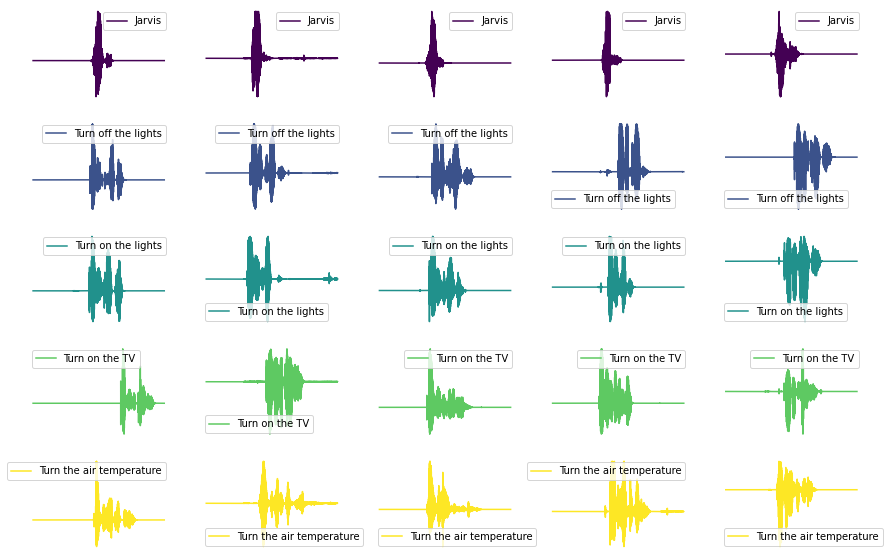

In [21]:
fig = plt.figure(figsize=(15, 10))
wavfiles = []
from pydub import AudioSegment
from pydub.playback import play
for i,f in enumerate(filenames):
    ax = fig.add_subplot(5,5,i+1)
    phrase = AudioSegment.from_wav(f)
    play(phrase)
    wavfiles.append(wav.read(f))
    for k,v in colors.items():
        if k in f: 
            color = colors[k][0]
            label = colors[k][1]
    ax.plot(wavfiles[-1][1], label=label, color=color)
    ax.axis('off')              
    plt.legend()

In [22]:
wavfiles = np.array([w[1] for w in wavfiles])
print ("the size of the full data set is :", wavfiles.shape)

the size of the full data set is : (25, 64000)


## Downsampling

In [23]:
print("calculating a distance matrix for the full files would requires " + 
      f"{wavfiles[0].shape[0]**2*64/8e9} GB of memory")
print("subsampling by a factor 10 requires " + 
      f"{wavfiles[0][::8].shape[0]**2*64/8e9} GB of memory")
print("subsampling by a factor 10 requires " + 
      f"{wavfiles[0][::10].shape[0]**2*64/8e9} GB of memory")
print("subsampling by a factor 100 requires " + 
      f"{wavfiles[0][::100].shape[0]**2*64/8e6} MB of memory")

calculating a distance matrix for the full files would requires 32.768 GB of memory
subsampling by a factor 10 requires 0.512 GB of memory
subsampling by a factor 10 requires 0.32768 GB of memory
subsampling by a factor 100 requires 3.2768 MB of memory


In [0]:
steps = 10
X = preprocessing.scale(wavfiles[:,::steps], axis=1)

In [25]:
X.shape, X.std(axis=1)

((25, 6400),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.]))

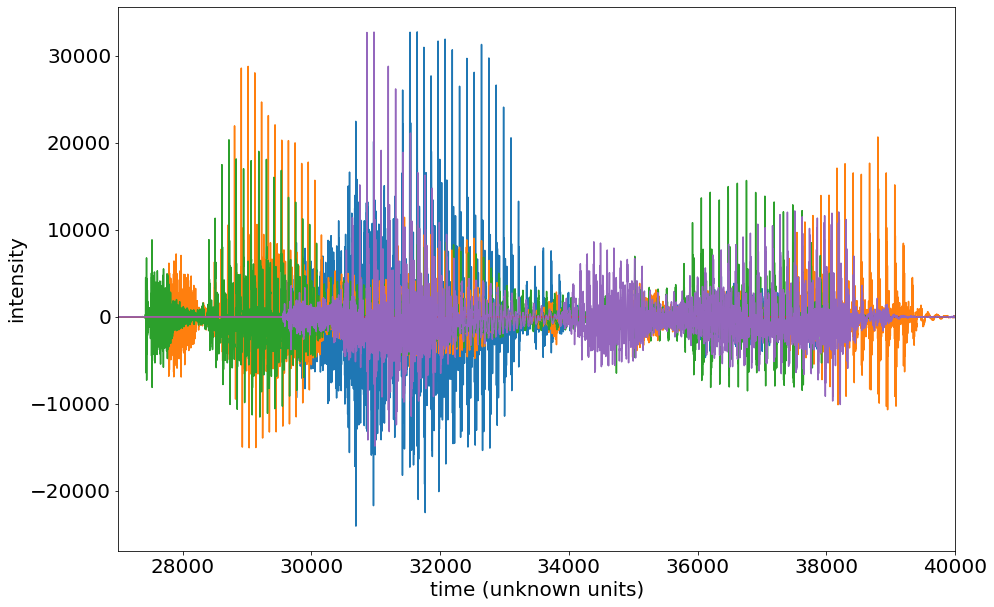

In [26]:
plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = 20
plt.plot(wavfiles[0])
plt.plot(wavfiles[5])
plt.plot(wavfiles[10])
plt.plot(wavfiles[15])
plt.plot(wavfiles[20])
plt.xlim(27000, 40000)
plt.xlabel("time (unknown units)", fontsize=20)
plt.ylabel("intensity", fontsize=20);

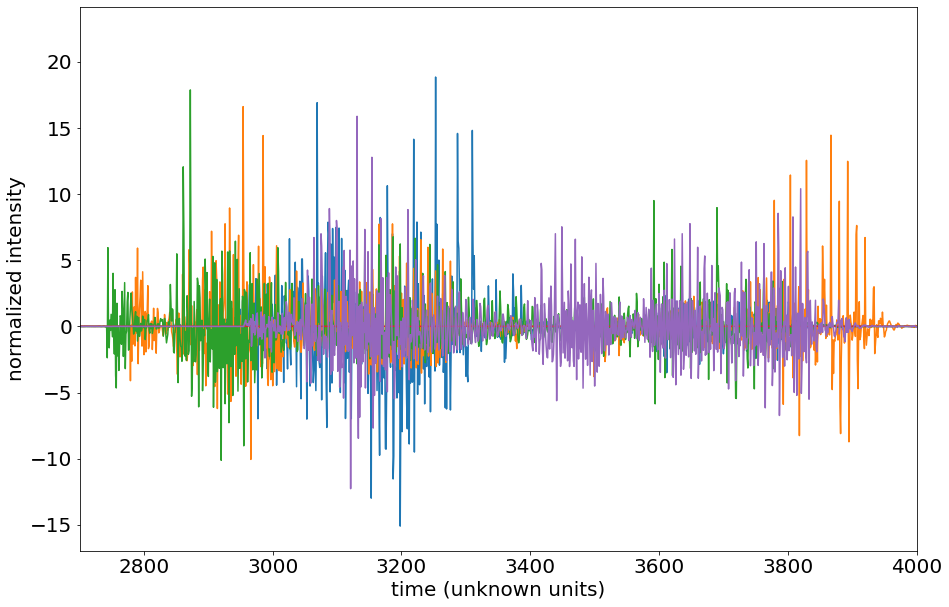

In [27]:
plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = 20
plt.plot(X[0])
plt.plot(X[5])
plt.plot(X[10])
plt.plot(X[15])
plt.plot(X[20])
plt.xlim(2700, 4000)
plt.xlabel("time (unknown units)", fontsize=20)
plt.ylabel("normalized intensity", fontsize=20);

## Calculating distance between sound bites

In [0]:
def naive_distances(a, b):
    return (a - b).sum()
def l1(a, b):
    return (np.abs(a - b)).sum()

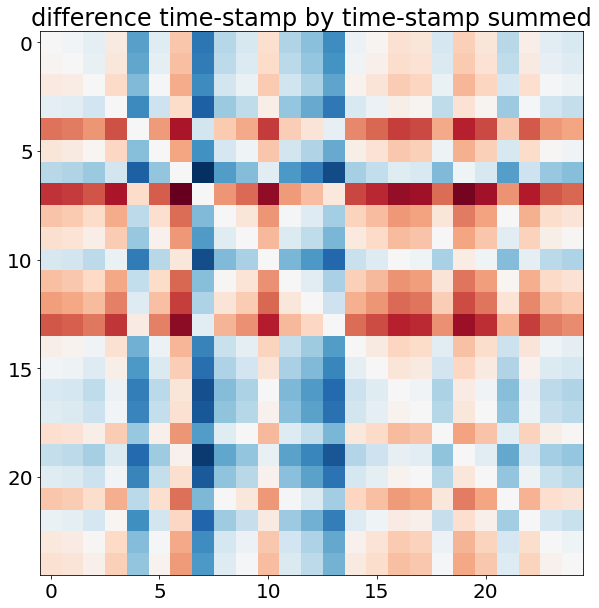

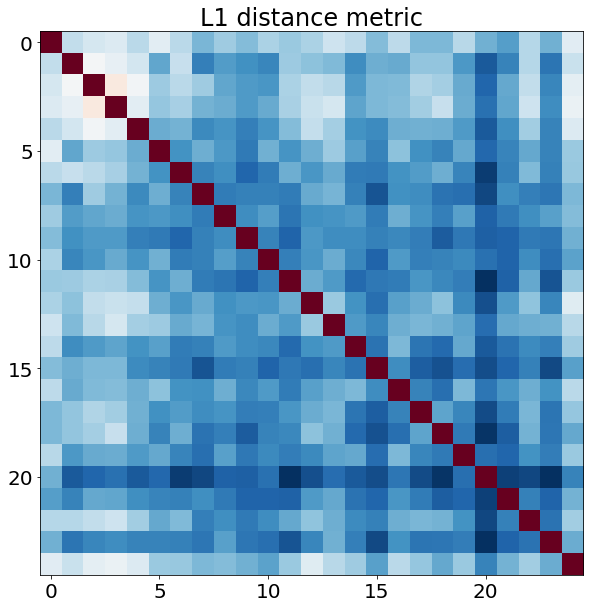

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(cdist(X[:,::steps], 
               X[:,::steps], metric=naive_distances), 
         cmap="RdBu")
plt.title("difference time-stamp by time-stamp summed")
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(cdist(X[:,::steps], 
               X[:,::steps], metric=l1), 
         cmap="RdBu")
plt.title("L1 distance metric");

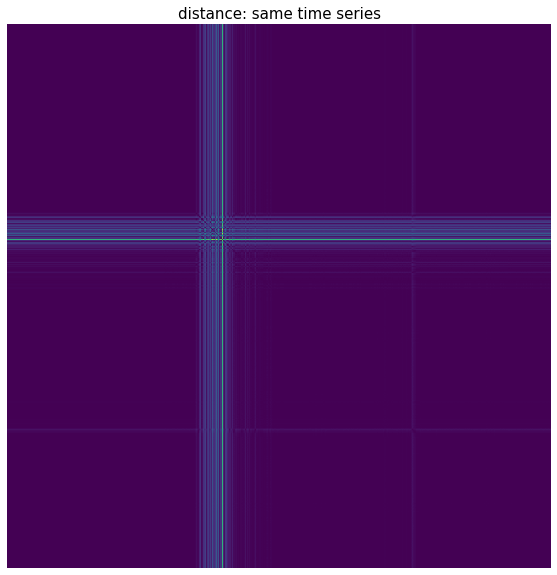

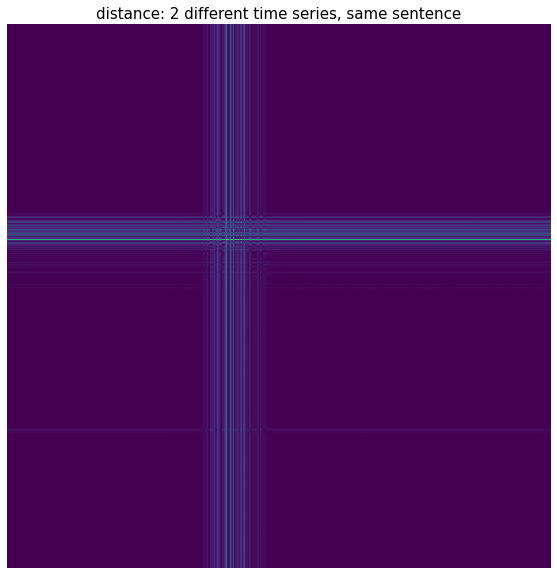

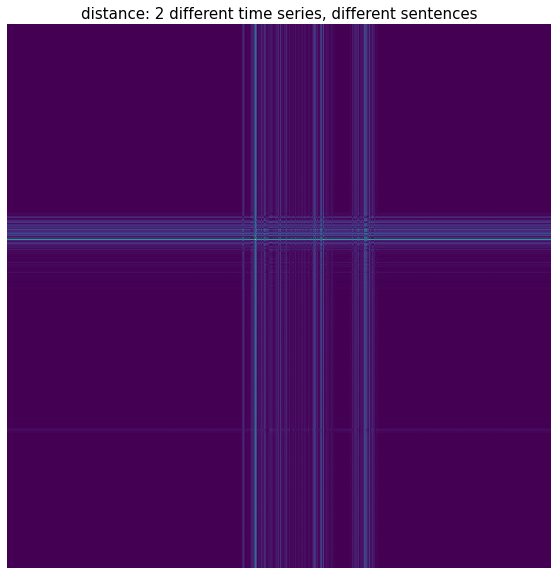

In [30]:
plt.figure(figsize=(10,10))
plt.imshow(cdist(np.atleast_2d(X[1][::steps]).T, 
                np.atleast_2d(X[1][::steps]).T,
      metric=l1))
plt.title("distance: same time series", fontsize=15)
plt.axis('off')
plt.figure(figsize=(10,10))
plt.imshow(cdist(np.atleast_2d(X[1][::steps]).T, 
                np.atleast_2d(X[2][::steps]).T,
      metric=l1))
plt.title("distance: 2 different time series, same sentence", fontsize=15);
plt.axis('off')
plt.figure(figsize=(10,10))
plt.imshow(cdist(np.atleast_2d(X[1][::steps]).T, 
                np.atleast_2d(X[10][::steps]).T,
      metric=l1))
plt.title("distance: 2 different time series, different sentences", 
         fontsize=15);
plt.axis('off');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


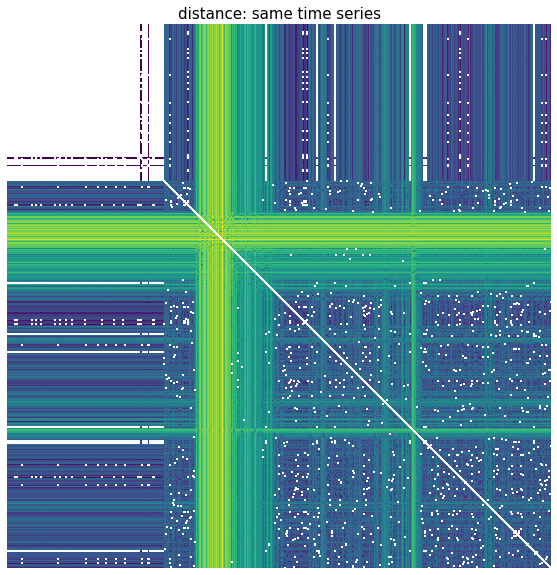

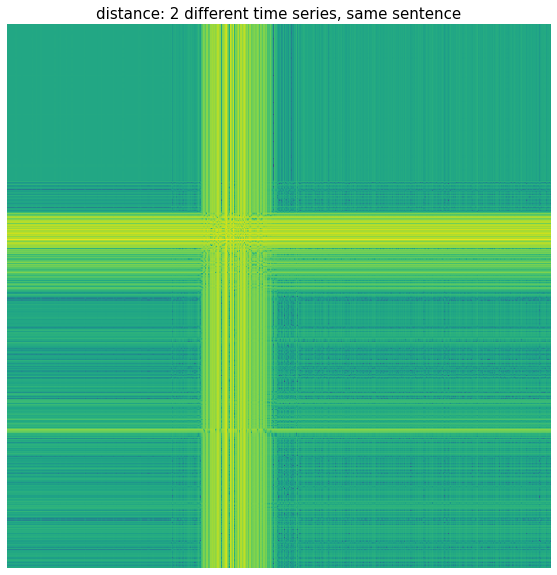

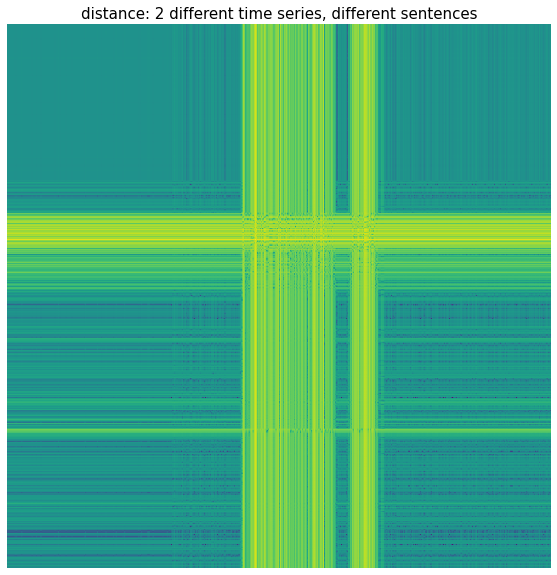

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(np.log10(cdist(np.atleast_2d(X[1][::steps]).T, 
                np.atleast_2d(X[1][::steps]).T,
      metric=l1)))
plt.title("distance: same time series", fontsize=15)
plt.axis('off')
plt.figure(figsize=(10,10))
plt.imshow(np.log10(cdist(np.atleast_2d(X[1][::steps]).T, 
                np.atleast_2d(X[2][::steps]).T,
      metric=l1)))
plt.title("distance: 2 different time series, same sentence", fontsize=15);
plt.axis('off')
plt.figure(figsize=(10,10))
plt.imshow(np.log10(cdist(np.atleast_2d(X[1][::steps]).T, 
                np.atleast_2d(X[10][::steps]).T,
      metric=l1)))
plt.title("distance: 2 different time series, different sentences", 
         fontsize=15);
plt.axis('off');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


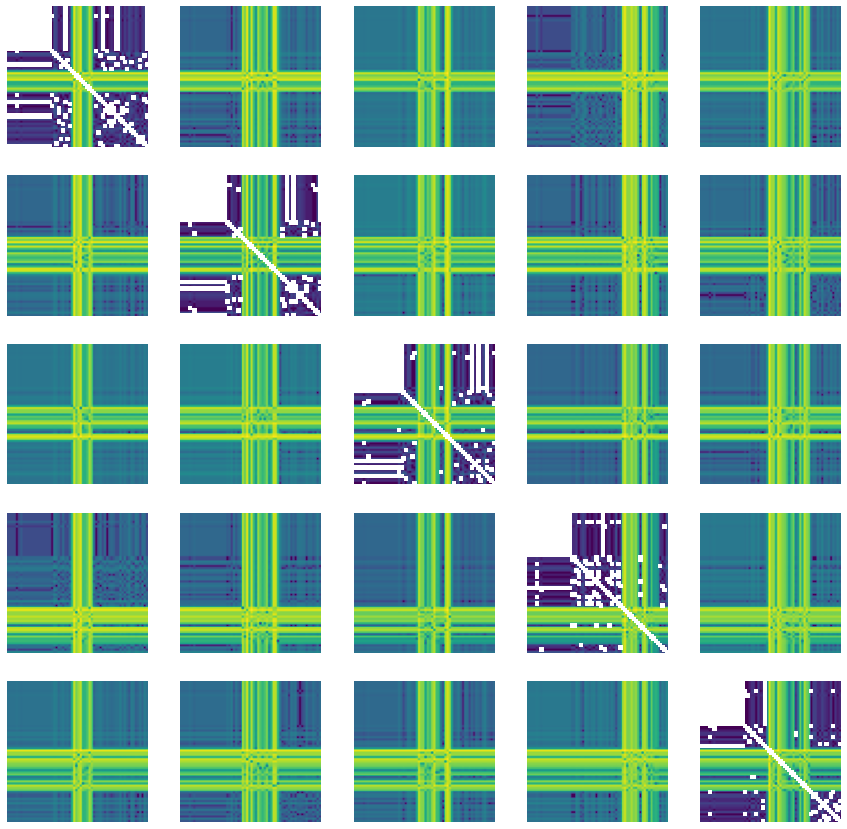

In [32]:
restep = 100
fig = plt.figure(figsize=(15, 15))

for i in range(0,25,5):
    for k, j in enumerate(range(0,25,5)):
        ax = fig.add_subplot(5,5,i + k + 1)
        plt.imshow(np.log10(cdist(np.atleast_2d(X[i][::restep]).T, 
                np.atleast_2d(X[j][::restep]).T, 
          metric=(lambda x,y: np.abs(x - y)))))
        plt.axis('off');

## DTW Algorithm

In [0]:
def path(DTWm):
  # the path can be calculated backword or forward
  # I find bacward more intuitive
  # start at one to the last cell:
  i, j = np.array(DTWm.shape) - 2

  #since I do not know how long the path is i will use lists
  # p and q will be the list of indices of the path element along the 2 array axes
  p, q = [i], [j]
  # go all the way to cell 0,0
  while (i > 0) or (j > 0):
      	# pick minimum of 3 surrounding elements: 
      	# the diagonal and the 2 surrounding it
        tb = np.argmin((DTWm[i, j], DTWm[i, j+1], DTWm[i+1, j]))
        #stay on the diagonal
        if tb == 0:
            i -= 1
            j -= 1
        #off diagonal choices: move only up or sideways
        elif tb == 1:
            i -= 1
        else:  # (tb == 2):
            j -= 1
        # put i and the j indexx into p and q pushing existing entries forward
        p.insert(0, i)
        q.insert(0, j)
  return np.array(p), np.array(q)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


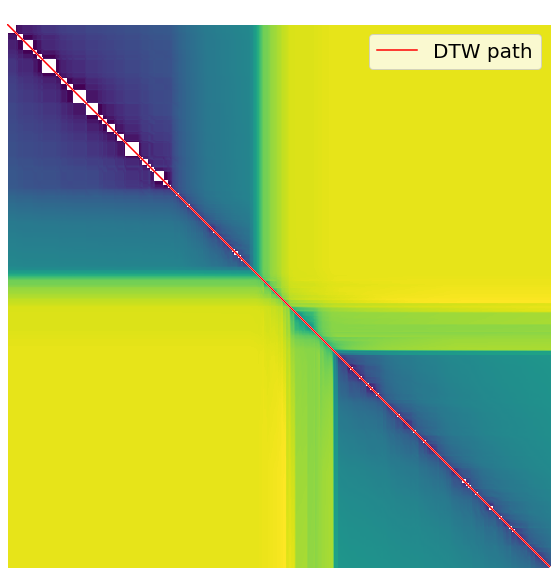

dtw distance:  0.0


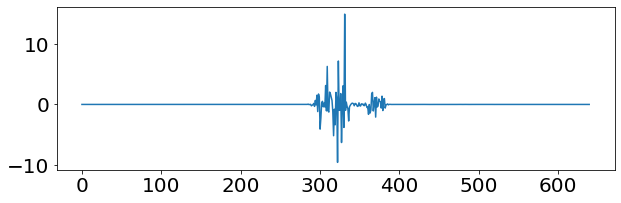

In [60]:
def dtw(X, Y, nsteps, show=False):

  #Calculate the distance matrix according to L1
  distmat = cdist(np.atleast_2d(X).T, np.atleast_2d(Y).T, metric=l1)

  dtwmat = np.full((len(X)+1,len(Y)+1), np.inf)

  #Set the 0,0 cell to 0
  dtwmat[0][0] = 0
  
  #Calculate DTW matrix
  for i in range(1, len(X)+1):
    for j in range(1, len(Y)+1):
      dtwmat[i][j] = distmat[i-1][j-1] + np.min([dtwmat[i-1][j-1], dtwmat[i-1][j], dtwmat[i][j-1]])
  
  #calculate the path
  dtwpath = path(dtwmat)

  if show == True:
    plt.figure(figsize=(10,10))
    plt.imshow(np.log10(dtwmat))
    plt.plot(dtwpath[0], dtwpath[1], color = 'red', label='DTW path')
    plt.title(" ", fontsize=15)
    plt.axis('off')
    plt.legend()
    plt.show()

  return dtwmat[-1,-1], dtwmat, dtwpath


# DTW distance to itself
restep=10
print("dtw distance: ", dtw(X[0][::restep], X[0][::restep], restep, show=True)[0]);
plt.figure(figsize=(10,3))
plt.plot(X[0][::restep]);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


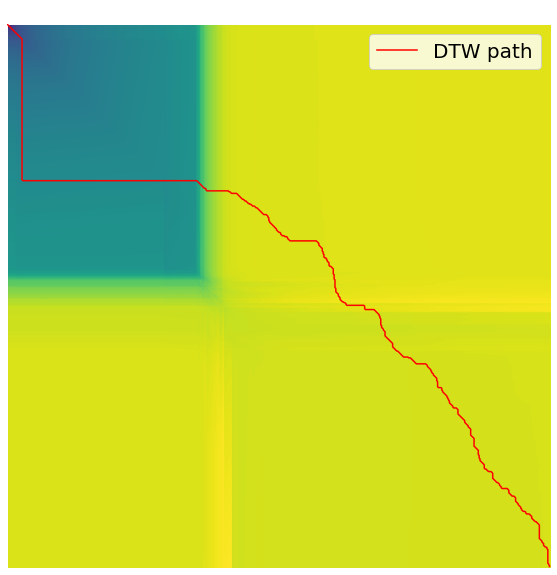

dtw distance:  121.55413980041301


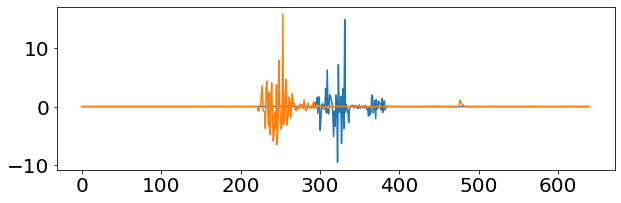

In [61]:
print("dtw distance: ", dtw(X[0][::restep], X[1][::restep], restep, show=True)[0])
plt.figure(figsize=(10,3))
plt.plot(X[0][::restep])
plt.plot(X[1][::restep]);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


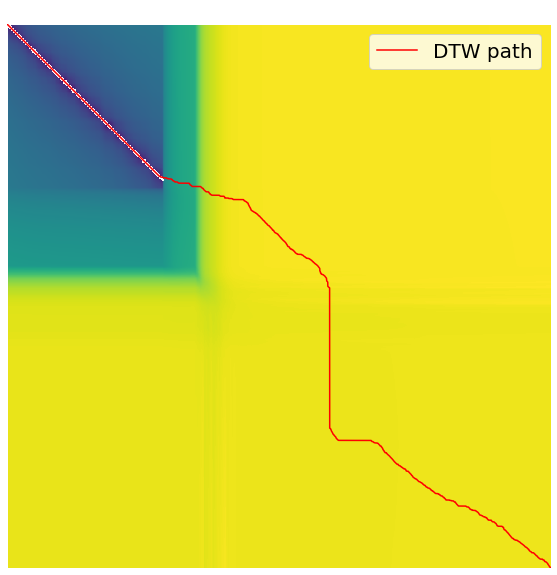

dtw distance:  2133719.0


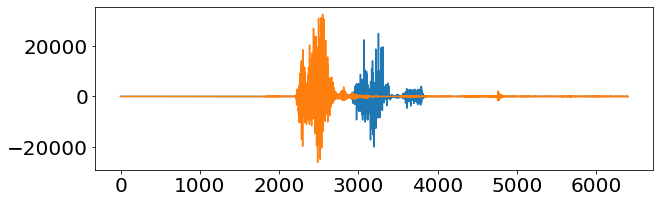

In [62]:
# DTW distance to a file with a different sound bite, normalized
print("dtw distance: ", dtw(wavfiles[0][::restep], wavfiles[1][::restep], restep, show=True)[0])
plt.figure(figsize=(10,3))
plt.plot(wavfiles[0][::restep])
plt.plot(wavfiles[1][::restep]);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


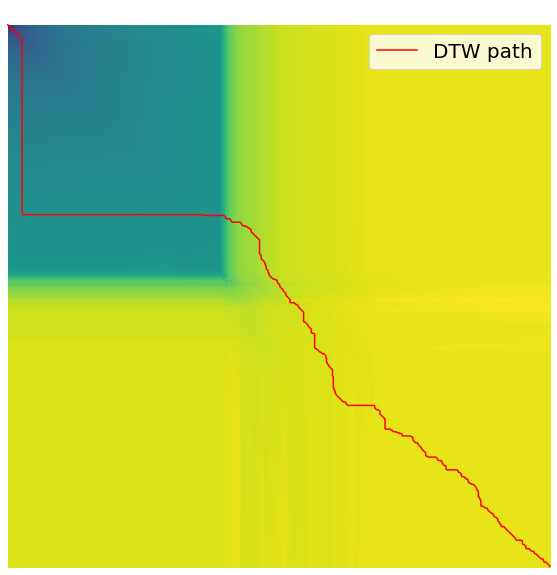

dtw distance:  150.50888976161608


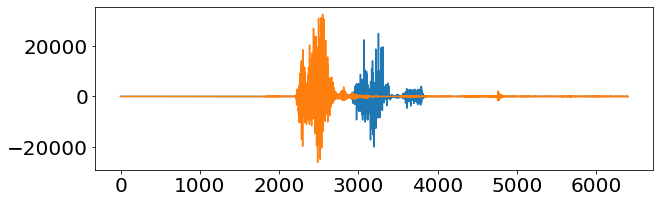

In [64]:
# DTW distance to a file with a different sound bite
print("dtw distance: ", dtw(X[0][::restep], X[24][::restep], restep, show=True)[0])
plt.figure(figsize=(10,3))
plt.plot(wavfiles[0][::restep])
plt.plot(wavfiles[1][::restep]);

## 2

In [66]:
distances = np.zeros(25) * np.nan
for i in range(25):
    print(i, "/25")
    distances[i], _, _ = dtw(X[0][::restep], X[i][::restep], restep);

0 /25
1 /25
2 /25
3 /25
4 /25
5 /25
6 /25
7 /25
8 /25
9 /25
10 /25
11 /25
12 /25
13 /25
14 /25
15 /25
16 /25
17 /25
18 /25
19 /25
20 /25
21 /25
22 /25
23 /25
24 /25


In [67]:
distances.argsort()

array([ 0,  3,  2,  1, 24, 13,  4,  5,  8, 22, 19, 15,  6, 16, 11, 12, 18,
        7,  9, 17, 10, 14, 23, 20, 21])

In [68]:
print("Based on its nearest neighbor the first sound bite says...")
print(y[distances.argsort()[1]])

Based on its nearest neighbor the first sound bite says...
Jarvis


## Task 4:

In [69]:
distancesE = np.zeros(25) * np.nan
for i in range(25):
    print(i, "/25")
    distancesE[i] = euclidean(X[19], X[i]);

0 /25
1 /25
2 /25
3 /25
4 /25
5 /25
6 /25
7 /25
8 /25
9 /25
10 /25
11 /25
12 /25
13 /25
14 /25
15 /25
16 /25
17 /25
18 /25
19 /25
20 /25
21 /25
22 /25
23 /25
24 /25


In [70]:
distancesE.argsort()

array([19,  0, 11, 18,  8, 12,  6, 16,  2, 14, 22,  3, 17, 21,  1,  4, 13,
        9, 10, 15,  5, 23, 24, 20,  7])

In [83]:
print("Based on its nearest neighbor and Euclidian distance ",
      "the last sound bite says...")
print(" ")
print("Correct!") if y[distancesE.argsort()[1]] == y[19] else print("Sorry...")

Based on its nearest neighbor and Euclidian distance  the last sound bite says...
 
Sorry...
19


In [76]:
distancesDTW = np.zeros(25) * np.nan
for i in range(25):
    print(i, "/25")
    distancesDTW[i] = dtw(X[19][::restep], X[i][::restep], restep)[0];

0 /25
1 /25
2 /25
3 /25
4 /25
5 /25
6 /25
7 /25
8 /25
9 /25
10 /25
11 /25
12 /25
13 /25
14 /25
15 /25
16 /25
17 /25
18 /25
19 /25
20 /25
21 /25
22 /25
23 /25
24 /25


In [84]:
distancesDTW.argsort()

array([19,  9,  2,  0, 24,  3,  4,  1, 15, 13, 11, 22, 16,  5,  6, 17, 12,
       14,  8, 18, 23, 10,  7, 21, 20])

In [85]:
print("Based on its nearest neighbor and DTW distance ",
      "the last sound bite says...")
print(y[distancesDTW.argsort()[1]])
print("Correct!") if y[distancesDTW.argsort()[1]] == y[19] else print("Sorry...")

Based on its nearest neighbor and DTW distance  the last sound bite says...
Tofftl
Sorry...
